## Reading the data

In [1]:
import pandas as pd
from tqdm import trange
df = pd.read_csv('papers.csv')

df.head()

,Conference,Year,Title,Author,Affiliation
0,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,Yingxue Wang,"Swiss Federal Institute of Technology, Zurich"
1,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,Rodney J Douglas,Institute of Neuroinformatics
2,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,Shih-Chii Liu,"Institute for Neuroinformatics, University of ..."
3,NeurIPS,2006,Multi-Task Feature Learning,Andreas Argyriou,Ecole Centrale de Paris
4,NeurIPS,2006,Multi-Task Feature Learning,Theos Evgeniou,INSEAD


## Columns in given csv file 

In [2]:
# features 
df.columns

Index(['Conference', 'Year', 'Title', 'Author', 'Affiliation'], dtype='object')

### Merging papers of same title into one paper 

In [25]:
# merger paper with same title but different author into one paper
df_cleaned=df.copy()
ct=0
df_cleaned['Authors']=""
i=0
while(i<len(df)):
    j=i
    authors=''
    while(j<len(df) and df['Title'][i]==df['Title'][j]):
        authors=authors+df['Author'][j]+ ','
        j=j+1
    i=j
    df_cleaned['Authors'][ct]=authors
    ct=ct+1

df_cleaned=df_cleaned.drop_duplicates(subset=['Title'])
df_cleaned

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_22516\167104628.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Authors'][ct]=authors


,Conference,Year,Title,Author,Affiliation,Authors
0,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,Yingxue Wang,"Swiss Federal Institute of Technology, Zurich","Yingxue Wang,Rodney J Douglas,Shih-Chii Liu,"
3,NeurIPS,2006,Multi-Task Feature Learning,Andreas Argyriou,Ecole Centrale de Paris,"Mike Mozer,Michael Jones,Michael Shettel,"
6,NeurIPS,2006,A Rate-Distortion Approach to Joint Pattern Al...,Andrea Vedaldi,Facebook AI Research and University of Oxford,"Alfred Hero,"
7,NeurIPS,2006,Context Effects in Category Learning: An Inve...,Mike Mozer,Google Research and U. Colorado Boulder,"Ping Li,Kenneth W Church,Trevor Hastie,"
10,NeurIPS,2006,Comparative Gene Prediction using Conditional ...,Jade P Vinson,Renaissance Technologies,"Michael Rabbat,Mario T Figueiredo,Rob Nowak,"
...,...,...,...,...,...,...
49291,ICLR,2021,Stochastic Security: Adversarial Defense Using...,Mitch Hill,University of Central Florida,
49294,ICLR,2021,Factorizing Declarative and Procedural Knowled...,Anirudh Goyal,"MILA, University of Montreal",
49302,ICLR,2021,Non-asymptotic Confidence Intervals of Off-pol...,Yihao Feng,The University of Texas at Austin,
49306,ICLR,2021,Combining Label Propagation and Simple Models ...,Qian Huang,Cornell University,


## Size of orignal data VS cleaned data

In [26]:
print("Size of original data",df.shape)
print("Size of cleaned data",df_cleaned.shape)


Size of original data (49317, 6)
Size of cleaned data (13263, 6)


In [29]:
#### Average author per paper

df_cleaned['Authors'].apply(lambda x: len(x.split(','))).mean()

2.1591645932292844

In [30]:
# Unique conferences
df_cleaned['Conference'].unique()

array(['NeurIPS', 'ICML', 'ICLR'], dtype=object)

## No fo Paper published in each conference

In [31]:
# Number of papers per conference
df_cleaned['Conference'].value_counts()


NeurIPS    8654
ICML       2912
ICLR       1697
Name: Conference, dtype: int64

<AxesSubplot: >

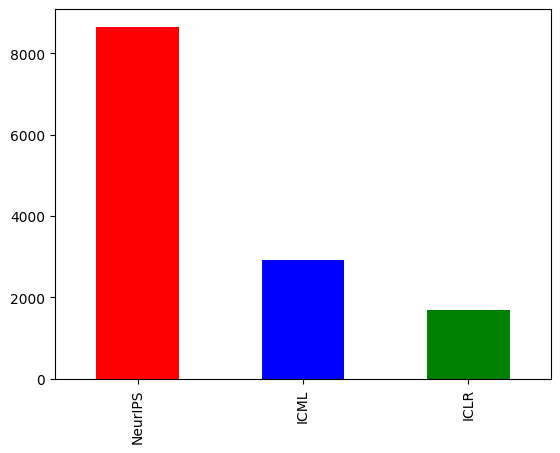

In [16]:
# bar graph of papers per conference with different colors

df_cleaned['Conference'].value_counts().plot(kind='bar',color=['red','blue','green'])


## Year wise distribution of papers

In [32]:
# year of publication
df_cleaned['Year'].value_counts()

2020    2982
2019    2701
2018    1966
2017    1113
2021     860
2016     568
2014     411
2015     403
2012     368
2013     360
2011     306
2010     292
2009     262
2008     250
2007     217
2006     204
Name: Year, dtype: int64

<AxesSubplot: >

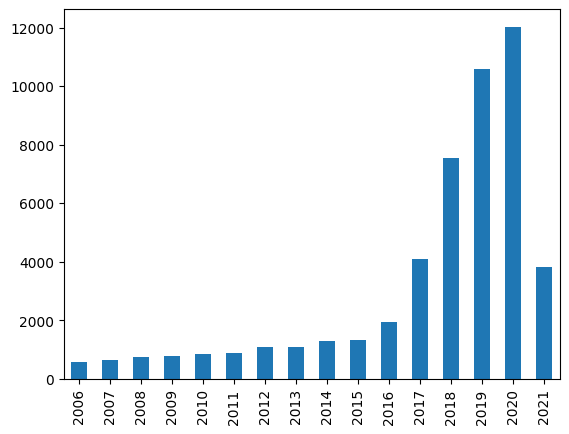

In [23]:
# bar graph of papers per year 
# sort from oldest to newest
df_cleaned['Year'].value_counts().sort_index().plot(kind='bar')


# Analysis of Affiliated Institutions

In [33]:
df['Affiliation'].unique()

array(['Swiss Federal Institute of Technology, Zurich',
       'Institute of Neuroinformatics',
       'Institute for Neuroinformatics, University of Zurich and ETH Zurich',
       ..., 'UCF', 'Soochow University, China',
       'Indian Institute of Technology Varanasi'], dtype=object)

In [34]:
# top ten most common affiliations
df['Affiliation'].value_counts().head(10)

Stanford University           1284
Google                        1192
DeepMind                      1191
Carnegie Mellon University    1132
UC Berkeley                   1064
MIT                           1003
Microsoft Research             732
Google Brain                   703
None                           689
Princeton University           566
Name: Affiliation, dtype: int64

<AxesSubplot: ylabel='Affiliation'>

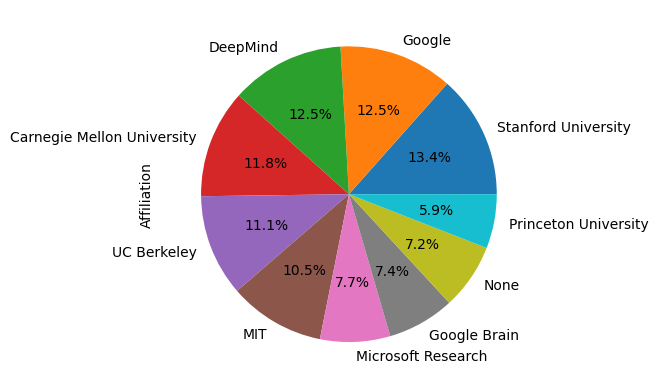

In [22]:
# pie chart of top ten affiliations with labelled percentages
df['Affiliation'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')

In [35]:
# find all none affiliations
df_cleaned[df_cleaned['Affiliation'] == 'None']

,Conference,Year,Title,Author,Affiliation,Authors
95,NeurIPS,2006,Large Margin Multi-channel Analog-to-Digital C...,Amit Gore,None,"Graham Taylor,Geoffrey E Hinton,Sam T Roweis,"
100,NeurIPS,2006,Learning on Graph with Laplacian Regularization,Rie Ando,None,"Hariharan Narayanan,Mikhail Belkin,Partha Niyogi,"
137,NeurIPS,2006,An Information Theoretic Framework for Eukaryo...,Joseph Kimmel,None,"Le Lu,Gregory D Hager,"
179,NeurIPS,2006,Tighter PAC-Bayes Bounds,Amiran Ambroladze,None,"Francis Bach,"
192,NeurIPS,2006,A selective attention multi--chip system with ...,Chiara Bartolozzi,None,"Chi-Hoon Lee,Shaojun Wang,Feng Jiao,Dale Schuu..."
197,NeurIPS,2006,An Approach to Bounded Rationality,Eli Ben-Sasson,None,"David P Wipf,Rey R Ramirez,Jason A Palmer,Scot..."
365,NeurIPS,2006,Structure Learning in Markov Random Fields,Sridevi Parise,None,"Daichi Mochihashi,Eiichiro Sumita,"
555,NeurIPS,2006,Natural Actor-Critic for Road Traffic Optimisa...,Silvia Richter,None,"Jeremy Hill,Jason Farquhar,Suzanne Martens,Fel..."
1202,NeurIPS,2008,Particle Filter-based Policy Gradient in POMDPs,Pierre-Arnaud Coquelin,None,"Ali Shojaie,George Michailidis,"
1790,NeurIPS,2008,Performance analysis for L_2 kernel classifica...,JooSeuk Kim,None,"Yudong Chen,Sujay Sanghavi,Huan Xu,"


In [36]:

# concatenate all title into one string
# sample only 5000 titles from the dataset
text_data = ' '.join(df_cleaned['Title'].sample(5000))


In [37]:
# export string to text file
with open('text_data.txt', 'w',encoding='utf-8') as f:
    f.write(text_data)



In [80]:
import requests
import json
import time


In [ ]:
# do above for 10 papers

citation_graph = {}


df_cleaned["cited_paper_ids"] = None
df_cleaned["PaperId"]=None

df_cleaned['no_of_paper_cited']=0

citation_graph_df=pd.DataFrame(columns=['paperId','Cited Paper Ids'])

no_of_paper_to_fetch=1000
citation_count={}
error_rate=0

for i in trange(no_of_paper_to_fetch):
    
    try:
        req2=requests.get("http://api.semanticscholar.org/graph/v1/paper/search?query="+df_cleaned['Title'][i])
        dic=json.loads(req2.content.decode('utf-8'))
       

        cited_paper=[]
    
        id=dic['data'][0]['paperId']
        
        search_by_id="https://api.semanticscholar.org/graph/v1/paper/"+id+"?fields=title,citations.authors,authors"
        req3=requests.get(search_by_id)
        dic2=json.loads(req3.content.decode('utf-8'))

        for citation in dic2['citations']:
            cited_paper.append(citation['paperId'])
        citation_graph_df.loc[i]=[id,cited_paper]
        citation_graph[id]=cited_paper
        df_cleaned['PaperId'][i]=id
        df_cleaned["cited_paper_ids"][i]=cited_paper
        df_cleaned["no_of_paper_cited"][i]=len(cited_paper)
        for paper in cited_paper:
            if paper in citation_count:
                citation_count[paper]=citation_count[paper]+1
            else:
                citation_count[paper]=1
       
    except:
        error_rate=error_rate+1
    time.sleep(0.1)
       

print("Error rate",error_rate/no_of_paper_to_fetch)



In [96]:
citation_graph.keys()
citation_graph_df.head()
df_cleaned
len(citation_count.keys())
# sort dictionary by value in descending order
sorted_citation_count = {k: v for k, v in sorted(citation_count.items(), key=lambda item: item[1],reverse=True)}
sorted_citation_count
# top 10 most cited papers
list(sorted_citation_count.keys())[:10]

# print value of top 10 most cited papers
print(list(sorted_citation_count.values())[:10])

# get title of top 10 most cited papers
top_10_cited_papers=[]
# remove none values
for paper in list(sorted_citation_count.keys())[:10]:
    # search by paper id in semantic scholar
    if(paper is None):
        continue
    search_by_id="https://api.semanticscholar.org/graph/v1/paper/"+paper+"?fields=title,citations.authors,authors"
    req3=requests.get(search_by_id)
    dic2=json.loads(req3.content.decode('utf-8'))
    top_10_cited_papers.append(dic2['title'])
top_10_cited_papers

    



[26, 9, 8, 8, 6, 6, 6, 6, 5, 5]


['Approximation and Relaxation Approaches for Parallel and Distributed Machine Learning',
 'New directions in semi-supervised learning',
 'Graphical Models: Modeling, Optimization, and Hilbert Space Embedding',
 'Multiresolution analysis of ranking data',
 'Convex relaxation methods for graphical models: Lagrangian and maximum entropy approaches',
 'AND THE COMMITTEE ON GRADUATE STUDIES OF STANFORD UNIVERSITY IN PARTIAL FULFILLMENT OF THE REQUIREMENTS FOR THE DEGREE OF DOCTOR OF PHILOSOPHY',
 'Graphical Models, Exponential Families, and Variational Inference',
 'Introduction to Semi-Supervised Learning',
 'Latent factor models for statistical relational learning']

In [97]:
# save df_cleaned to csv
df_cleaned.to_csv('df_cleaned.csv',index=False)


## Graphical representation of citations 

In [98]:
# First networkx library is imported
# along with matplotlib
# import networkx as nx
# import matplotlib.pyplot as plt

# G=nx.Graph()

# for key in citation_graph.keys():
# 	for value in citation_graph[key]:
# 		if(value is not None):
# 			G.add_edge(key,value)

# nx.draw(G)

# plt.show()




## Getting country of affiliation

In [165]:
# university all over the world https://github.com/endSly/world-universities-csv




# import pandas as pd
country_university=pd.read_csv('world-universities.csv')


country_university.columns=['Country','University','Domain']
country_university.head()

# import enchant.utils as enchant_utils
import enchant

# match each paper with its university
df_cleaned['University']=None
df_cleaned['Country']=None

# match the affliation to closest university and country

# make dictionary of mapping country to university
country_university_dict={}
for i in range(len(country_university)):
    country=country_university['Country'][i]
    university=country_university['University'][i]
    if(country in country_university_dict):
        country_university_dict[country].append(university)
    else:
        country_university_dict[country]=[university]
country_university_dict['IN']


['Acharya Nagarjuna University',
 'Acharya Ranga Agricultural University',
 'Ahmedabad University',
 'AISECT University',
 'Alagappa University',
 'Aligarh Muslim University',
 'Allahabad Agricultural Institute, Deemed University',
 'Allahabad University',
 'All India Institute of Medical Sciences',
 'Amity University',
 'Amravati University',
 'Amrita Vishwa Vidyapeetham (Deemed University)',
 'Andhra University',
 'Annamalai University',
 'Anna University',
 'Anna University of Technology, Tirunelveli',
 'ARYA Institute of Engineering & Technology',
 'Asian Business School',
 'Assam Agricultural University',
 'Assam University',
 'Avinashilingam Institute for Home Science and Higher Education for Women',
 'Awadhesh Pratap Singh University',
 'Babasaheb Bhimrao Ambedkar University',
 'Banaras Hindu University',
 'Banasthali University',
 'Bangalore University',
 'Bankura University',
 'Barkatullah University',
 'Bengal Engineering College',
 'Berhampur University',
 'Bhagwant Universi

In [176]:

## Indian universities present in the dataset

def get_uni_in_dataset(country_code):

    unique_affiliations=df['Affiliation'].unique()

    indian_universities=[]
    all_indian_universities=country_university_dict[country_code]
    for university in all_indian_universities:
        
        if(university in unique_affiliations ):
            indian_universities.append(university)
        # else:
        #     # find closest match
        #     for affiliation in unique_affiliations:
        #         if(affiliation is None or type(affiliation) is not str):
        #             continue
        #         if(affiliation in university):
                    
        #             print(affiliation + "  ---  "+university)
        #             indian_universities.append(university)
        #             break
                    
    return indian_universities

developed_countirs=['AU','FR','GB','US','JP','CA','RU']
# map this country to its paper 
for country in developed_countirs:
    for uni in get_uni_in_dataset(country):
        df_cleaned.loc[df_cleaned['Affiliation'] == uni, 'Country'] = country

        
df_cleaned


# get no of papers per country

no_of_papers_per_country={}
for country in developed_countirs:
    no_of_papers_per_country[country]=len(df_cleaned.loc[df_cleaned['Country'] == country])
no_of_papers_per_country

{'AU': 81, 'FR': 15, 'GB': 464, 'US': 3255, 'JP': 48, 'CA': 317, 'RU': 6}

In [179]:
## for african countries

african_countries=['ZA','EG','NG','KE','TN','GH','CM','CI','MA','DZ','SN','UG']
for country in african_countries:
    for uni in get_uni_in_dataset(country):
        df_cleaned.loc[df_cleaned['Affiliation'] == uni, 'Country'] = country
no_of_papers_per_country={}
for country in african_countries:
    try:
        no_of_papers_per_country[country]=len(df_cleaned.loc[df_cleaned['Country'] == country])
    except:
        print(country+" not found")
no_of_papers_per_country

{'ZA': 0,
 'EG': 1,
 'NG': 0,
 'KE': 0,
 'TN': 0,
 'GH': 0,
 'CM': 0,
 'CI': 0,
 'MA': 0,
 'DZ': 0,
 'SN': 0,
 'UG': 0}

In [181]:
# asian countries
asian_countries=['IN','CN','PK','ID','MY','VN','HK','TW', 'SG', 'IR']
for country in asian_countries:
    for uni in get_uni_in_dataset(country):
        df_cleaned.loc[df_cleaned['Affiliation'] == uni, 'Country'] = country
no_of_papers_per_country={}
for country in asian_countries:
    try:
        no_of_papers_per_country[country]=len(df_cleaned.loc[df_cleaned['Country'] == country])
    except:
        print(country+" not found")
no_of_papers_per_country

{'IN': 23,
 'CN': 504,
 'PK': 0,
 'ID': 0,
 'MY': 0,
 'VN': 0,
 'HK': 26,
 'TW': 12,
 'SG': 101,
 'IR': 7}

In [182]:
def get_count_by_group(grp):
    asian_countries=grp
    for country in asian_countries:
        for uni in get_uni_in_dataset(country):
            df_cleaned.loc[df_cleaned['Affiliation'] == uni, 'Country'] = country
    no_of_papers_per_country={}
    for country in asian_countries:
        try:
            no_of_papers_per_country[country]=len(df_cleaned.loc[df_cleaned['Country'] == country])
        except:
            print(country+" not found")
    return no_of_papers_per_country

print(get_count_by_group(developed_countirs))

{'AU': 81, 'FR': 15, 'GB': 464, 'US': 3255, 'JP': 48, 'CA': 317, 'RU': 6}


In [193]:
south_asian_countries=['IN','CN','PK','ID','MY','VN','HK','TW', 'SG', 'IR','NP','KR']
african_countries =['ZA','NG','ZW','DZ','EG','GA','LY','TN']
europian_countries =['GB','FR','ES','PT','DE','RU','PL','BE','CH','DK','FI','SE','IT','NL','TR','IE','HU','BG']
gulf_countries =['IR','SA','AE','QA','IQ','KW','IL','JO']
north_american_countries =['MX','US','CA']
south_american_countries =['BR','AR','CL','UY','CO','EC']
oceania=['AU','NZ']

print(get_count_by_group(south_asian_countries))
print(get_count_by_group(african_countries))
print(get_count_by_group(europian_countries))
print(get_count_by_group(gulf_countries))
print(get_count_by_group(north_american_countries))
print(get_count_by_group(south_american_countries))
print(get_count_by_group(oceania))




{'IN': 23, 'CN': 504, 'PK': 0, 'ID': 0, 'MY': 0, 'VN': 0, 'HK': 26, 'TW': 12, 'SG': 101, 'IR': 7, 'NP': 0, 'KR': 62}
{'ZA': 0, 'NG': 0, 'ZW': 0, 'DZ': 0, 'EG': 1, 'GA': 0, 'LY': 0, 'TN': 0}
{'GB': 464, 'FR': 15, 'ES': 13, 'PT': 0, 'DE': 18, 'RU': 6, 'PL': 4, 'BE': 5, 'CH': 21, 'DK': 20, 'FI': 16, 'SE': 21, 'IT': 22, 'NL': 64, 'TR': 2, 'IE': 0, 'HU': 1, 'BG': 0}
{'IR': 7, 'SA': 0, 'AE': 0, 'QA': 0, 'IQ': 0, 'KW': 0, 'IL': 99, 'JO': 0}
{'MX': 0, 'US': 3255, 'CA': 317}
{'BR': 1, 'AR': 0, 'CL': 5, 'UY': 0, 'CO': 0, 'EC': 0}
{'AU': 81, 'NZ': 0}


In [ ]:

## create a data frame with country and no of papers
country_paper_count=pd.DataFrame(columns=['Country','Count'])
unique_countries=country_university['Country'].unique()
print(unique_countries)
for country in unique_countries:
    if type(country) is not str:
        continue
    total_paper_count=get_count_by_group([country])[country]
    country_paper_count=country_paper_count.append({'Country':country,'Count':total_paper_count},ignore_index=True)
country_paper_count.head()


In [231]:
import pycountry

def get_country_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return country_code

country_paper_count['Country']=country_paper_count['Country'].apply(get_country_name)
country_paper_count.dropna(inplace=True)
country_paper_count.head()
# export to csv
country_paper_count.to_csv('country_paper_count.csv',index=False)


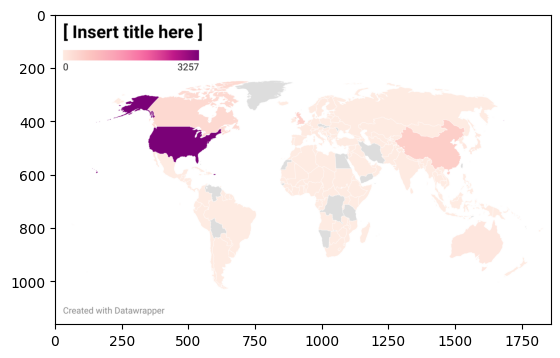

In [233]:
# read jpg using matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img=mpimg.imread('heat_map_papers.png')
imgplot = plt.imshow(img)
plt.show()



<AxesSubplot: ylabel='Count'>

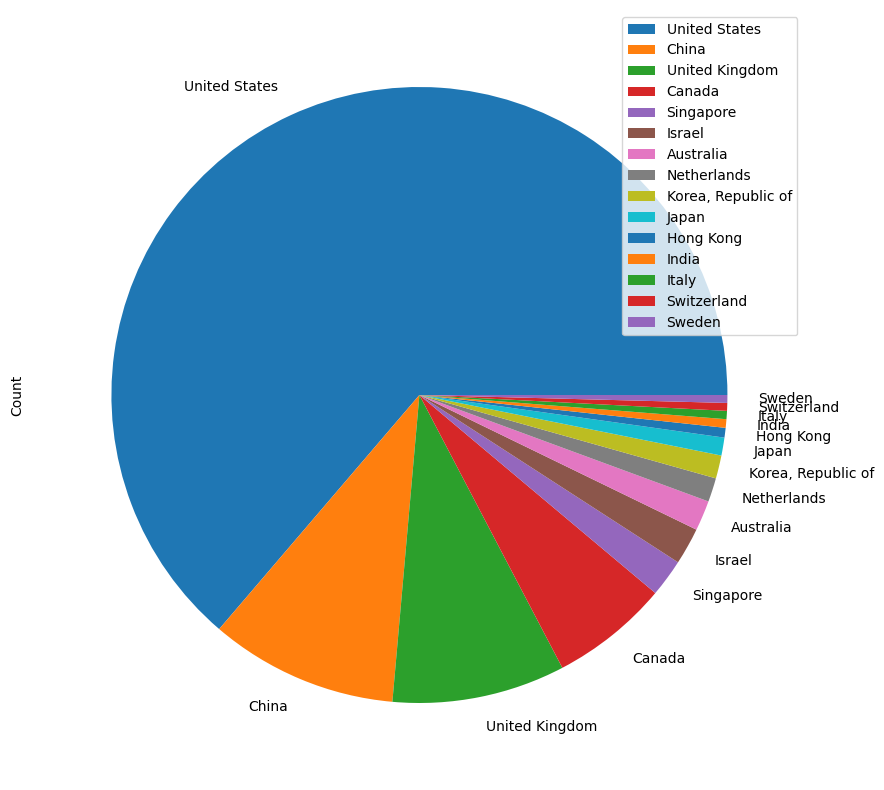

In [243]:
# total paper count for which country is found
country_paper_count['Count'].sum()

# pie chart for country paper count using pandas for top 20 countries
country_paper_count.sort_values(by=['Count'],ascending=False,inplace=True)
country_paper_count.head(15).plot(kind='pie',y='Count',labels=country_paper_count['Country'],figsize=(10,10))

In [244]:
## assigning countires to the remaining papers
# get all the papers for which country is not found
df_cleaned.loc[df_cleaned['Country'].isnull()]

## give them closest match


,Conference,Year,Title,Author,Affiliation,Authors,no_of_citations,cited_paper_ids,PaperId,no_of_paper_cited,Country,University
3,NeurIPS,2006,Multi-Task Feature Learning,Andreas Argyriou,Ecole Centrale de Paris,"Mike Mozer,Michael Jones,Michael Shettel,",2,"[ad82862b99028bf87eda454bf0f92788f19cdbac, 489...",1cac3ee85e52cb0afde71f66472e35a315a4a112,2,None,None
6,NeurIPS,2006,A Rate-Distortion Approach to Joint Pattern Al...,Andrea Vedaldi,Facebook AI Research and University of Oxford,"Alfred Hero,",0,None,None,0,None,None
7,NeurIPS,2006,Context Effects in Category Learning: An Inve...,Mike Mozer,Google Research and U. Colorado Boulder,"Ping Li,Kenneth W Church,Trevor Hastie,",3,"[c5c744b1609f473c882bcbd751eb13a72f13e7bc, f5a...",7227f224679969446d5363c7dbfd61bcdd4b338f,3,None,None
10,NeurIPS,2006,Comparative Gene Prediction using Conditional ...,Jade P Vinson,Renaissance Technologies,"Michael Rabbat,Mario T Figueiredo,Rob Nowak,",12,None,None,0,None,None
14,NeurIPS,2006,Causal inference in sensorimotor integration,Konrad P Kording,MIT,"Robert Jenssen,Torbjorn Eltoft,Mark A Girolami...",34,"[fd1621615511d7dd035863c112757e67172da7b5, f86...",219a1eed0d61a144024a6d1cf487c116d1cfd017,34,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
49245,ICLR,2021,Learning to Sample with Local and Global Conte...,Youngmin Oh,Samsung Advanced Institute of Technology,,0,None,None,0,None,None
49256,ICLR,2021,Contrastive Syn-to-Real Generalization,Wuyang Chen,"University of Texas, Austin",,0,None,None,0,None,None
49272,ICLR,2021,Prototypical Representation Learning for Relat...,Ning Ding,"Tsinghua University, Tsinghua University",,0,None,None,0,None,None
49294,ICLR,2021,Factorizing Declarative and Procedural Knowled...,Anirudh Goyal,"MILA, University of Montreal",,0,None,None,0,None,None
